In [5]:
import pandas as pd
from datetime import datetime
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [6]:
df = pd.read_csv("static-data/OpenTable-YoY_Seated_Diner_Data.csv")
df = df.melt(id_vars=["Type", "Name"], var_name="date", value_name="% change")
assert (df.columns == ['Type', 'Name', 'date', '% change']).all()
df.columns = ["type", "name", "date", "% change"]
df["datetime"] = df["date"].apply(lambda x: datetime(2020, *map(int, x.split("/"))))
df.loc[df.name == "Ciudad de México", "name"] = "Mexico City"
df.head()

,type,name,date,% change,datetime
0,country,Global,2/18,-1.0,2020-02-18
1,country,Australia,2/18,-3.0,2020-02-18
2,country,Canada,2/18,-5.0,2020-02-18
3,country,Germany,2/18,11.0,2020-02-18
4,country,Ireland,2/18,2.0,2020-02-18


In [7]:
df.to_csv("data/open-table.csv", index=False)

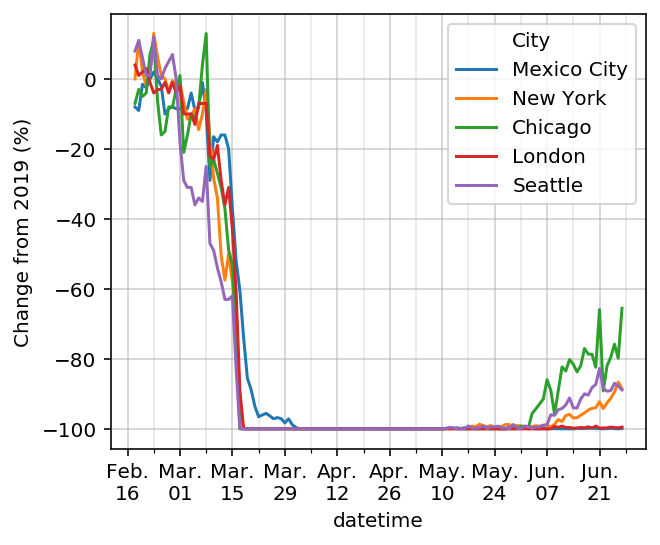

In [8]:

to_show = [
    "Chicago",
    "Mexico City",
    "London",
    "Seattle",
    "New York",
]

show = df[df.name.isin(to_show)].copy()

show["City"] = show["name"]

w = 4
fig, ax = plt.subplots(figsize=(1.2 * w, w))
ax = sns.lineplot(
    x="datetime",
    y="% change",
    hue="City",
    data=show,
    ci=None,
    ax=ax,
)

weeks = pd.date_range(datetime(2020, 2, 15), datetime.now() + timedelta(7), freq="2W")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b.\n%d"))
ax.xaxis.set_major_locator(plt.FixedLocator([mdates.date2num(w) for w in weeks]))

weeks = pd.date_range(datetime(2020, 2, 15 + 7), datetime.now() + timedelta(7), freq="2W")
ax.xaxis.set_minor_locator(plt.FixedLocator([mdates.date2num(w) for w in weeks]))

ax.grid(which="major", axis="both", alpha=0.6)
ax.grid(which="minor", axis="x", alpha=0.3)
ax.set_ylabel("Change from 2019 (%)")
fig.savefig("imgs/opentable-cities.svg", bbox_inches="tight")
fig.savefig("imgs/opentable-cities.png", bbox_inches="tight", dpi=300)

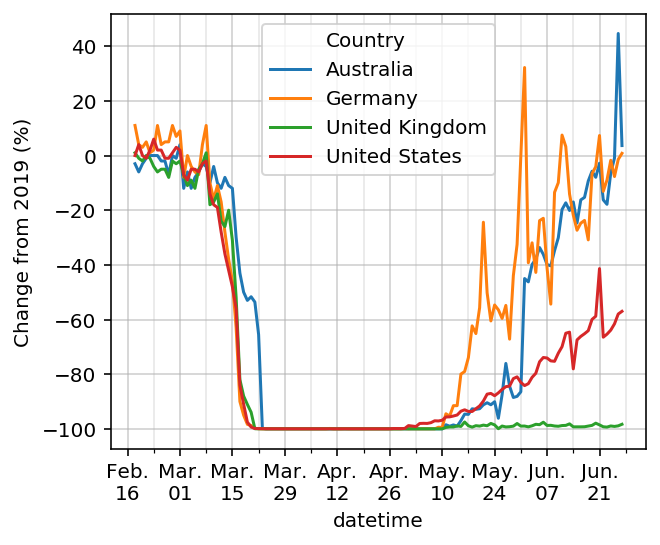

In [9]:
to_show = [
    "Australia",
    "Germany",
    "United Kingdom",
    "United States",
]

show = df[df.name.isin(to_show)].copy()

show["Country"] = show["name"]

w = 4
fig, ax = plt.subplots(figsize=(1.2 * w, w))
ax = sns.lineplot(
    x="datetime",
    y="% change",
    hue="Country",
    data=show,
    ci=None,
    ax=ax,
)

weeks = pd.date_range(datetime(2020, 2, 15), datetime.now() + timedelta(7), freq="2W")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b.\n%d"))
ax.xaxis.set_major_locator(plt.FixedLocator([mdates.date2num(w) for w in weeks]))

weeks = pd.date_range(datetime(2020, 2, 15 + 7), datetime.now() + timedelta(7), freq="2W")
ax.xaxis.set_minor_locator(plt.FixedLocator([mdates.date2num(w) for w in weeks]))

ax.grid(which="major", axis="both", alpha=0.6)
ax.grid(which="minor", axis="x", alpha=0.3)
ax.set_ylabel("Change from 2019 (%)")
fig.savefig("imgs/opentable.svg", bbox_inches="tight")
fig.savefig("imgs/opentable.png", bbox_inches="tight", dpi=300)